In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uber-ride-price-prediction/uber.csv


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('/kaggle/input/uber-ride-price-prediction/uber.csv', usecols=["pickup_datetime", "fare_amount", "passenger_count", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude"])

In [3]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.shape

(200000, 7)

In [5]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967153,40.767158,-73.963659,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [7]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [8]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [9]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

<Axes: >

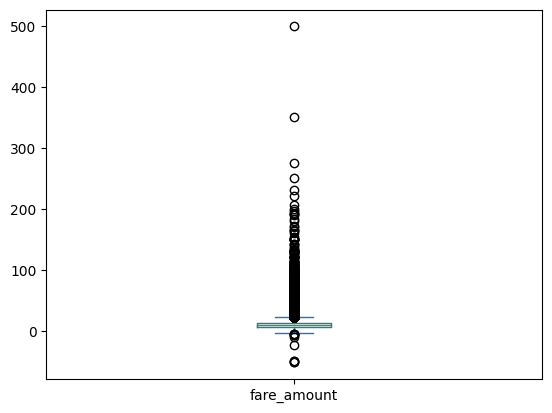

In [12]:
df['fare_amount'].plot(kind='box')

In [13]:
df = df[df['fare_amount'] > 0]

<Axes: >

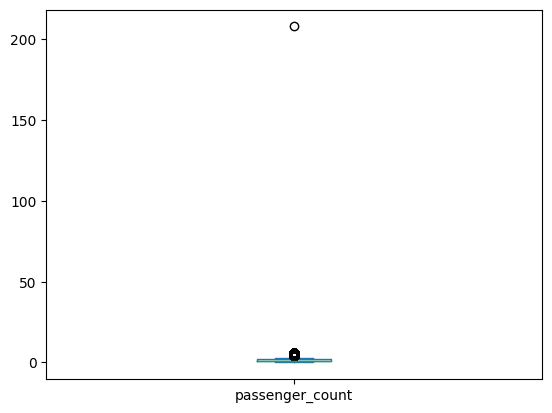

In [14]:
df['passenger_count'].plot(kind='box')

In [15]:
df[df['passenger_count'] == df.passenger_count.max()]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
113038,11.7,2010-12-28 08:20:00+00:00,-73.937795,40.758498,-73.937835,40.758415,208


In [16]:
df = df[df['passenger_count'] < df.passenger_count.max()]

In [17]:
df.shape

(199976, 7)

<Axes: >

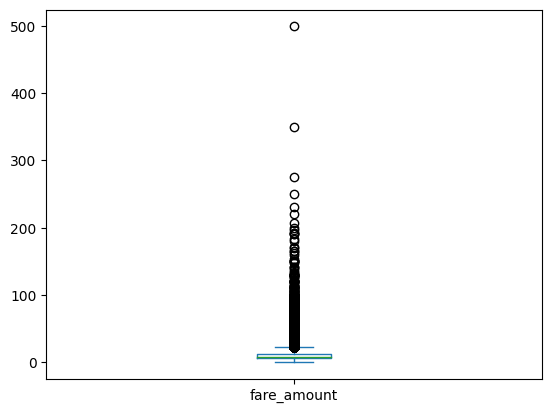

In [18]:
df['fare_amount'].plot(kind='box')

In [19]:
iqr = df.fare_amount.quantile(0.75) - df.fare_amount.quantile(0.25)
lower_bound = df.fare_amount.quantile(0.25) - iqr * 1.5
upper_bound = df.fare_amount.quantile(0.75) + iqr * 1.5
print("lower bound", lower_bound)
print("upper bound", upper_bound)

lower bound -3.75
upper bound 22.25


In [20]:
df[df['fare_amount'] == df.fare_amount.min()].head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
21658,0.01,2015-05-31 16:13:41+00:00,-73.991692,40.770802,-73.991692,40.770824,1
191228,0.01,2010-03-08 18:44:57+00:00,-74.000523,40.725868,-73.956960,40.780855,1


In [21]:
df[df['fare_amount'] == df.fare_amount.max()].head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
170081,499.0,2011-04-10 04:10:00+00:00,-73.968377,40.764602,-73.968368,40.7646,1


In [22]:
# Valid latitudes and longitudes
df = df[(df['pickup_longitude'] >= -180) & (df['pickup_longitude'] <= 180)]
df = df[(df['pickup_latitude'] >= -90) & (df['pickup_latitude'] <= 90)]

df = df[(df['dropoff_longitude'] >= -180) & (df['dropoff_longitude'] <= 180)]
df = df[(df['dropoff_latitude'] >= -90) & (df['dropoff_latitude'] <= 90)]

In [23]:
df[(df['fare_amount'] > 0) & (df['fare_amount'] < upper_bound)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199994,12.0,2014-01-31 14:42:00+00:00,-73.983070,40.760770,-73.972972,40.754177,1
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695416,1


<Axes: >

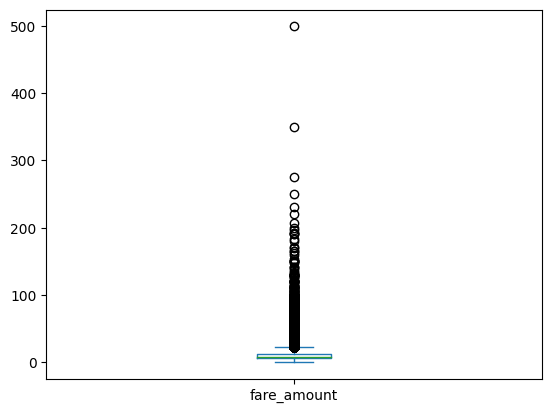

In [24]:
df['fare_amount'].plot(kind='box')

<Axes: title={'center': 'Density curve of fare amount'}, ylabel='Density'>

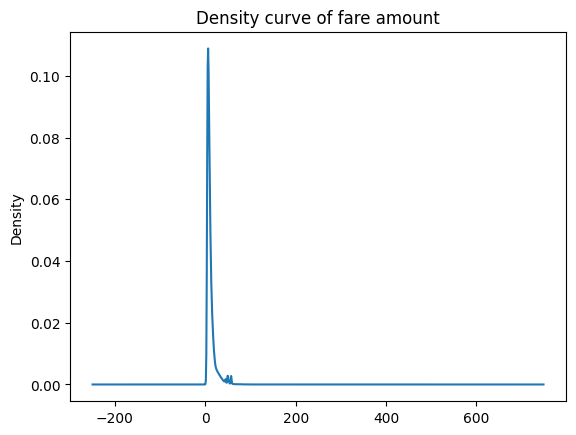

In [25]:
df['fare_amount'].plot(kind='kde', title="Density curve of fare amount")

<Axes: ylabel='Frequency'>

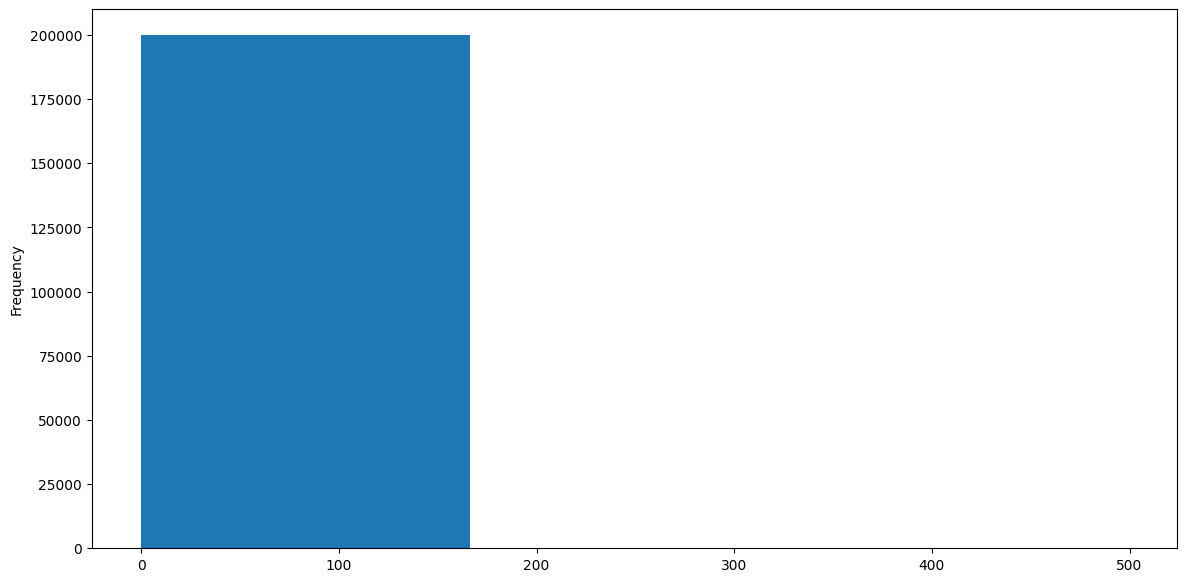

In [26]:
df['fare_amount'].plot(kind='hist', bins=3, figsize=(14,7))

In [27]:
df[df['fare_amount'] == df.fare_amount.min()].head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
21658,0.01,2015-05-31 16:13:41+00:00,-73.991692,40.770802,-73.991692,40.770824,1
191228,0.01,2010-03-08 18:44:57+00:00,-74.000523,40.725868,-73.956960,40.780855,1


In [28]:
!pip install geopy

In [29]:
# Calculate the distance between the pickup and the dropoff location
from geopy.distance import geodesic

def calculate_distance(x):
    return geodesic((x['pickup_latitude'], x['pickup_longitude']), (x['dropoff_latitude'], x['dropoff_longitude'])).km

df['distance'] = df.apply(lambda x : calculate_distance(x), axis = 1)

In [30]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.681111
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.454363
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.039603
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661442
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.483730


<Axes: title={'center': 'Density curve of ride distance'}, ylabel='Density'>

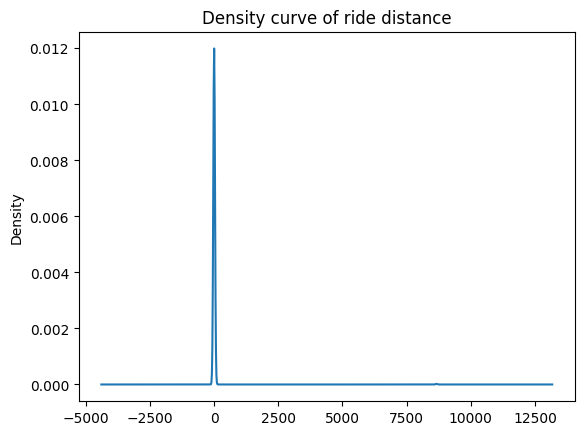

In [31]:
df['distance'].plot(kind='kde', title='Density curve of ride distance')

In [32]:
import datetime as dt

In [33]:
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].apply(lambda x : 1 if x > 4 else 0)
df['is_rush_hour'] = df['hour'].apply(lambda x : 1 if x in [7,8,9,19,20,21] else 0)

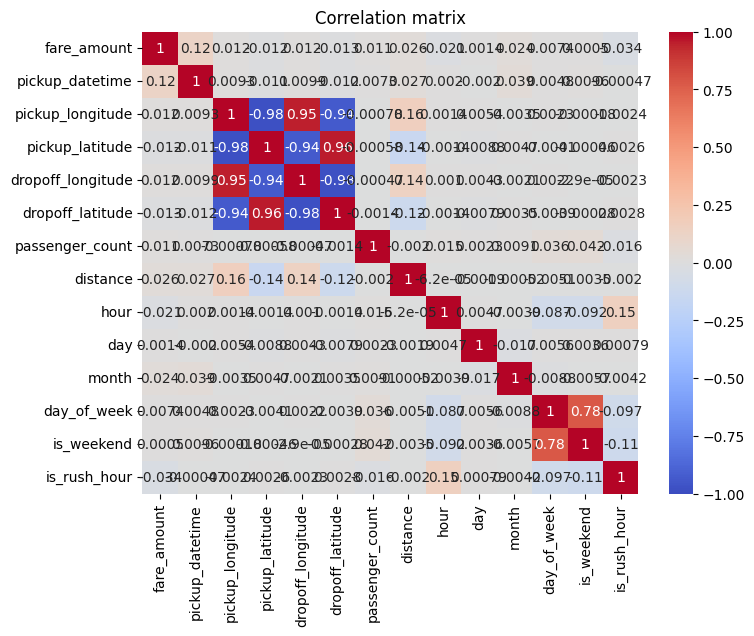

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation matrix")
plt.show()

In [35]:
df.drop(['pickup_datetime'],axis=1, inplace=True)

In [36]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,hour,day,month,day_of_week,is_weekend,is_rush_hour
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,1.681111,19,7,5,3,0,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2.454363,20,17,7,4,0,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,5.039603,21,24,8,0,0,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,1.661442,8,26,6,4,0,1
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,4.483730,17,28,8,3,0,0


In [37]:
df.shape

(199964, 13)

In [38]:
# Main prediction
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [39]:
x = df.drop('fare_amount', axis=1)
y = df['fare_amount']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [41]:
numeric_features = ['passenger_count', 'pickup_logitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'distance', 'hour', 'day', 'month', 'day_of_week']

In [42]:
trf1 = ColumnTransformer([
    ('num', StandardScaler(), slice(0,12))
])

In [43]:
pipe = Pipeline([
    ('trf1', trf1),
    ('xgb', xgb.XGBRFRegressor())
])

In [44]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  slice(0, 12, None))])),
                ('xgb',
                 XGBRFRegressor(base_score=None, booster=None, callbacks=None,
                                colsample_bylevel=None, colsample_bytree=None,
                                device=None, early_stopping_rounds=None,
                                enable_categorical=False, eval_metric=None,
                                feature_types=None, gamma=None,
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None, max_bin=None,
                                max_cat_threshold=None, max_cat_to_onehot=None,
                                max_delta_step=None, max_depth=None,
                                max_leaves=None, min_child_weight=None,
                                missing=nan, monotone_constraints=None,
                                multi_strategy=None, n_estimators=None,
                                n_jobs=None, num_parallel_tree=None,
                                objective='reg:squarederror', random_state=None,
                                reg_alpha=None, ...))])

In [45]:
y_pred = pipe.predict(X_test)
y_pred

array([ 9.533322 , 31.09931  ,  8.273671 , ..., 10.394653 ,  6.4953876,
       11.723821 ], dtype=float32)

In [46]:
pipe.named_steps

{'trf1': ColumnTransformer(transformers=[('num', StandardScaler(), slice(0, 12, None))]),
 'xgb': XGBRFRegressor(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='reg:squarederror',
                random_state=None, reg_alpha=None, ...)}

In [47]:
mean_squared_error(y_test, y_pred)

23.440328393796094

In [48]:
np.sqrt(mean_squared_error(y_test, y_pred))

4.84152128920199

In [49]:
# Cross validation using pipeline
cross_val_score(pipe, x, y, cv=5, scoring="neg_mean_squared_error")

array([-28.22959415, -21.93473505, -20.68136495, -23.60845916,
       -29.49725228])

In [50]:
np.array([-28.22959415, -21.93473505, -20.68136495, -23.60845916,
       -29.49725228]).mean()

-24.790281118

In [51]:
# Grid Search using GRidSearchCV
from sklearn.model_selection import GridSearchCV

params = {
    'xgb__n_estimators' : [100,200,300],
    "xgb__max_depth" : [2,3,4]
}

grid = GridSearchCV(pipe, param_grid=params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid.fit(x,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         slice(0, 12, None))])),
                                       ('xgb',
                                        XGBRFRegressor(base_score=None,
                                                       booster=None,
                                                       callbacks=None,
                                                       colsample_bylevel=None,
                                                       colsample_bytree=None,
                                                       device=None,
                                                       early_stopping_rounds=None,
                                                       enable_categorical=False,
                                                       eval_metric=None,
                                                       feature_types=None,
                                                       gamma=None...
                                                       max_depth=None,
                                                       max_leaves=None,
                                                       min_child_weight=None,
                                                       missing=nan,
                                                       monotone_constraints=None,
                                                       multi_strategy=None,
                                                       n_estimators=None,
                                                       n_jobs=None,
                                                       num_parallel_tree=None,
                                                       objective='reg:squarederror',
                                                       random_state=None,
                                                       reg_alpha=None, ...))]),
             n_jobs=-1,
             param_grid={'xgb__max_depth': [2, 3, 4],
                         'xgb__n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [52]:
grid.best_params_

{'xgb__max_depth': 4, 'xgb__n_estimators': 300}

In [53]:
pipe = Pipeline([
    ('trf1', trf1),
    ('xgb', xgb.XGBRFRegressor())
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  slice(0, 12, None))])),
                ('xgb',
                 XGBRFRegressor(base_score=None, booster=None, callbacks=None,
                                colsample_bylevel=None, colsample_bytree=None,
                                device=None, early_stopping_rounds=None,
                                enable_categorical=False, eval_metric=None,
                                feature_types=None, gamma=None,
                                grow_policy=None, importance_type=None,
                                interaction_constraints=None, max_bin=None,
                                max_cat_threshold=None, max_cat_to_onehot=None,
                                max_delta_step=None, max_depth=None,
                                max_leaves=None, min_child_weight=None,
                                missing=nan, monotone_constraints=None,
                                multi_strategy=None, n_estimators=None,
                                n_jobs=None, num_parallel_tree=None,
                                objective='reg:squarederror', random_state=None,
                                reg_alpha=None, ...))])

In [54]:
y_pred = pipe.predict(X_test)

In [55]:
mean_squared_error(y_test, y_pred)

23.440328393796094

In [56]:
np.sqrt(mean_squared_error(y_test, y_pred))

4.84152128920199

In [57]:
import pickle
os.makedirs('../models', exist_ok=True)

In [58]:
with open('../models/model_xgb.pkl', 'wb') as file:
    pickle.dump(pipe, file)
print("Model saved successfully!!")

Model saved successfully!!


In [59]:
model = pickle.load(open('../models/model_xgb.pkl', 'rb'))

In [60]:
# now take a sample data and predict the fare amount
# pickup_datetime	pickup_longitude	pickup_latitude	dropoff_longitude	dropoff_latitude	passenger_count
pickup_datetime = '2012-04-21 08:30:00'
pickup_longitude = -73.987130
pickup_latitude = 40.732029
dropoff_longitude = -73.991875
dropoff_latitude = 40.74942
passenger_count = 1

# need to make this: pickup_longitude	pickup_latitude	dropoff_longitude	dropoff_latitude	passenger_count	distance	hour	day	month	day_of_week	is_weekend	is_rush_hour
data = {'pickup_datetime':pickup_datetime, 'pickup_longitude':pickup_longitude, 'pickup_latitude':pickup_latitude, 'dropoff_longitude':dropoff_longitude, 'dropoff_latitude':dropoff_latitude, 'passenger_count':passenger_count}
df = pd.DataFrame(data, index=[0])
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['distance'] = df.apply(lambda x: calculate_distance(x), axis=1)
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x > 4 else 0)
df['is_rush_hour'] = df['hour'].apply(lambda x: 1 if x in [7,8,9,16,17,18] else 0)
df.drop(['pickup_datetime'],axis=1,inplace=True)
df

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,hour,day,month,day_of_week,is_weekend,is_rush_hour
0,-73.98713,40.732029,-73.991875,40.74942,1,1.972399,8,21,4,5,1,1


In [61]:
fare_amount = model.predict(df)
fare_amount

array([8.265574], dtype=float32)